# CO2 emission

# Task1

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Task2

In [81]:
#(a)
df = pd.read_csv('CO2 emission.csv') #read's csv file
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [82]:
#(b)
df.head() # to display fist five rows

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [83]:
#(c)
emission_new = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']] #selecting only 4 columns
emission_new.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# Type3

In [84]:
#(a)
emission_new.describe() #checks statics for given dataset

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [86]:
#(b)
emission_new.dtypes #Check the units of all the columns

ENGINESIZE              float64
CYLINDERS                 int64
FUELCONSUMPTION_COMB    float64
CO2EMISSIONS              int64
dtype: object

# Type4

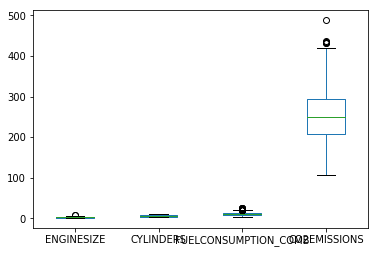

In [87]:
#(a)
emission_new.plot(kind='box') # plots boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B096F9E9B0>,
      dtype=object)

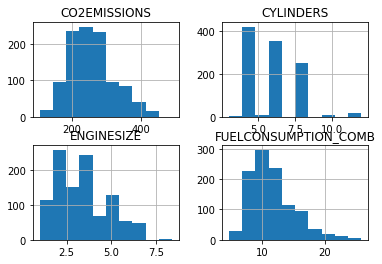

In [88]:
emission_new.hist() #plots histogram

In [89]:
#(b)
emission_new.corr() #finds corrolation

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


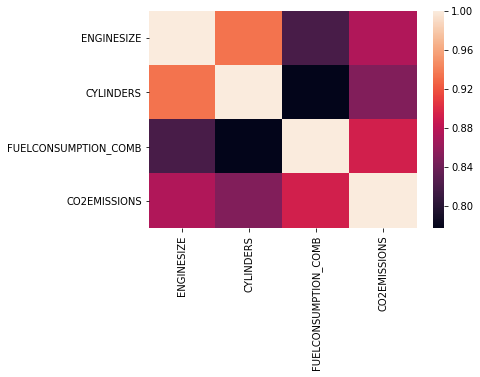

In [90]:
#(c)
corr = emission_new.corr()  
ax = sns.heatmap(corr)  #plots heatmap

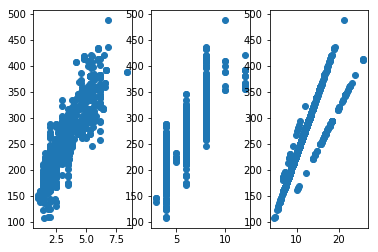

In [92]:
#(d)
x1 = emission_new['ENGINESIZE']
y1 = emission_new['CO2EMISSIONS']
x2 = emission_new['CYLINDERS']
x3 = emission_new['FUELCONSUMPTION_COMB']
plt.subplot(1,3,1)
plt.scatter(x1, y1)   #plots 3 scatter plots using subplot

plt.subplot(1,3,2)
plt.scatter(x2, y1)

plt.subplot(1,3,3)
plt.scatter(x3, y1)

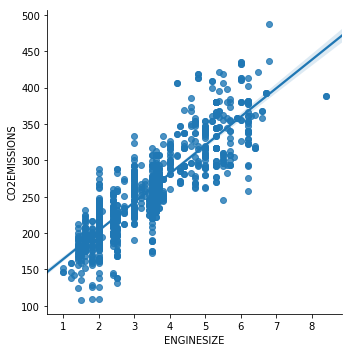

In [93]:
#(e)
x = emission_new['ENGINESIZE']
y = emission_new['CO2EMISSIONS']
sns.lmplot('ENGINESIZE', 'CO2EMISSIONS',data=emission_new)  #plots lmplot between 'ENGINESIZE' and 'CO2EMISSIONS'

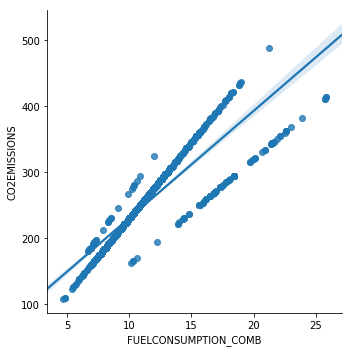

In [94]:
x = emission_new['FUELCONSUMPTION_COMB']
y = emission_new['CO2EMISSIONS']
sns.lmplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS',data=emission_new) #plots lmplot between 'FUELCONSUMPTION_COMB' and 'CO2EMISSIONS'

# Type5

In [95]:
#(a)
x = np.array(list(emission_new['ENGINESIZE'])).reshape(-1, 1) #converting into 2d array
y = np.array(list(emission_new['CO2EMISSIONS'])).reshape(-1, 1)
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size=.2) #splitting data into train and test
reg = LinearRegression()  #function helps to make linear regression
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
r1 = reg.score(train_x, train_y)  #displays the R-value of data
r1

0.7592564354157664

[[38.76961981]]
[126.72932613]


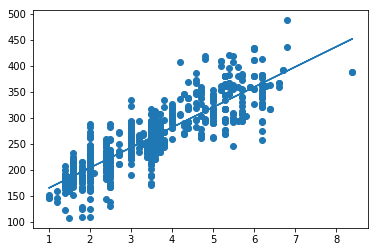

In [99]:
#(b)
pre = reg.predict(train_x)  #predict value of train_x
plt.scatter(train_x, train_y) #plot scatterplot 
print(reg.coef_)   #prints coefficient
print(reg.intercept_)  #prints intercept_parameter
plt.plot(train_x, pre)  #plots regression line

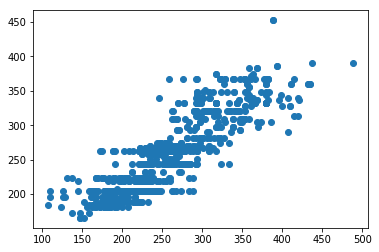

In [100]:
#(c)
plt.scatter(train_y, pre) #plots scatter plot

In [101]:
#(d)
pred = reg.predict(test_x)
lr = metrics.mean_squared_error(test_y, pred) #mean square error
lr

900.9458821819114

# Task6

In [102]:
#(a)
mul_x=emission_new[['ENGINESIZE','FUELCONSUMPTION_COMB']] #adding multiple columns
mul_y = np.array(emission_new['CO2EMISSIONS']).reshape(-1,1) #reshaping into 2d array
mul_train_x,mul_test_x,mul_train_y,mul_test_y = train_test_split(mul_x, mul_y, test_size=.2) #splitting data into train and test
mul_reg=linear_model.LinearRegression() #function
mul_reg.fit(mul_train_x,mul_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
r2 = mul_model.score(mul_test_x,mul_test_y) #R-value
r2

0.8375724582883118

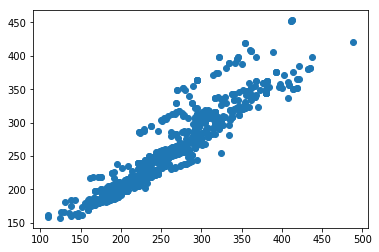

In [104]:
#(b)
m = mul_reg.predict(mul_train_x)  #predict for mul_train_x
plt.scatter(mul_train_y, m)  #plots scatter plot

In [105]:
#(c)
mul_pred_y = mul_reg.predict(mul_test_x)
mv = metrics.mean_squared_error(mul_test_y, mul_pred_y)  #mean square error
mv 

625.0039817805676

In [106]:
#(d)
print('Error for linear regression:', lr)
print('error for multivarient prediction:', mv)
print('R-value for linear regression:', r1)
print('R-value for multivarient prediction:', r2)
'Multivariate Prediction Model is suitable because it has less MSE compare to Linear Regression model and also high R-value for Multivariate Prediction Model'

Error for linear regression: 900.9458821819114
error for multivarient prediction: 625.0039817805676
R-value for linear regression: 0.7592564354157664
R-value for multivarient prediction: 0.8375724582883118


'Multivariate Prediction Model is suitable because it has less MSE compare to Linear Regression model and also high R-value for Multivariate Prediction Model'